In [27]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

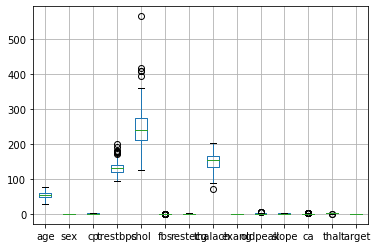

In [5]:
df.boxplot()

<AxesSubplot:>

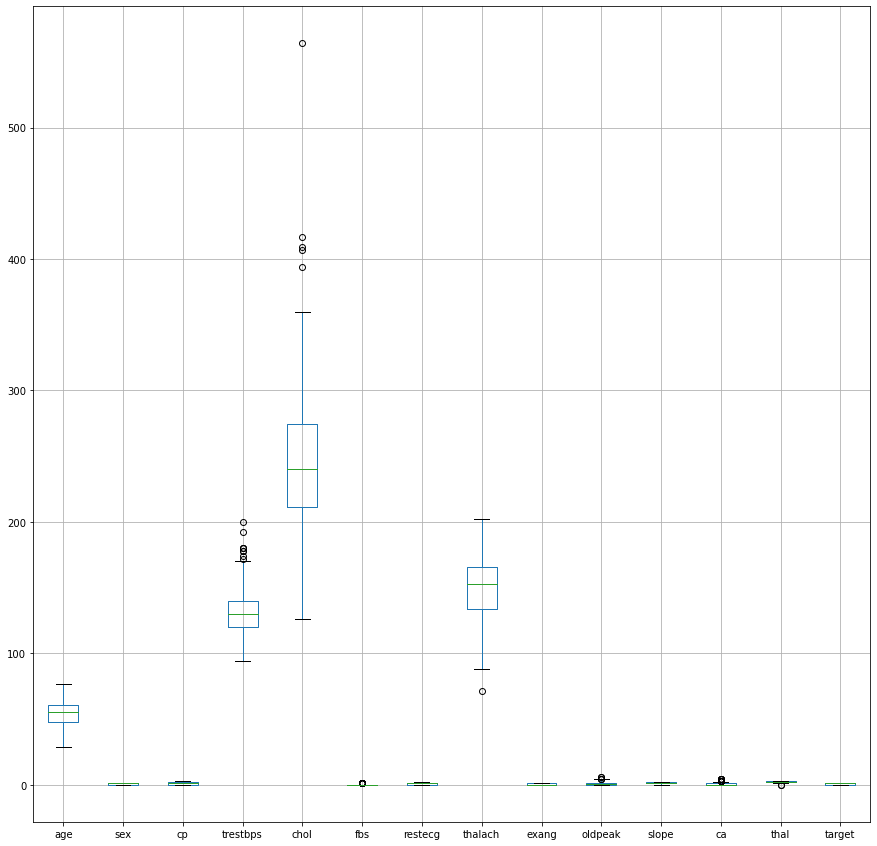

In [6]:
plt.figure(figsize=(15,15))
df.boxplot()

## Feature Engineering

#### Noraamlization

In [7]:
x = df.drop('target',axis=1)
y= df.target

In [8]:
normal_scalar= MinMaxScaler()
x_scaled=normal_scalar.fit_transform(x)
x_normalized=pd.DataFrame(x_scaled,columns=x.columns)
x_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


<AxesSubplot:>

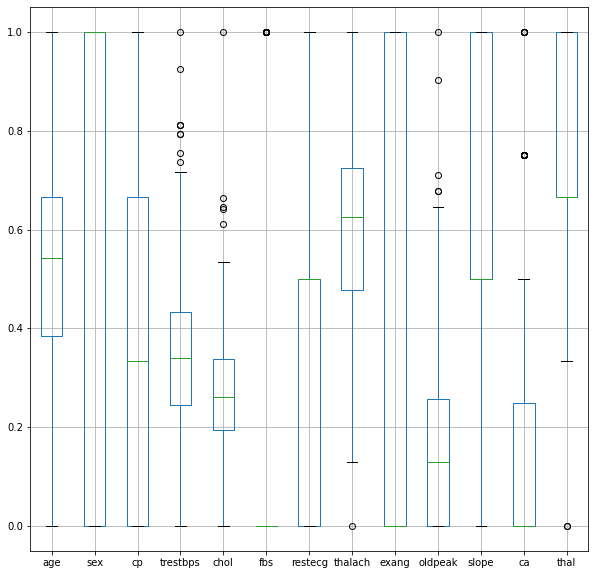

In [9]:
plt.figure(figsize=(10,10))
x_normalized.boxplot()

In [10]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [11]:
x_normalized.loc[x_normalized['trestbps']>0.8]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
110,0.729167,0.0,0.000000,0.811321,0.454338,0.0,0.5,0.633588,1.0,0.000000,1.0,0.00,0.666667
203,0.812500,1.0,0.666667,0.811321,0.337900,1.0,0.0,0.603053,1.0,0.258065,0.5,0.00,1.000000
223,0.562500,0.0,0.000000,1.000000,0.369863,1.0,0.0,0.473282,1.0,0.645161,0.0,0.50,1.000000
248,0.520833,1.0,0.333333,0.924528,0.358447,0.0,0.0,0.946565,0.0,0.000000,1.0,0.25,1.000000
266,0.541667,0.0,0.000000,0.811321,0.458904,0.0,1.0,0.351145,1.0,0.548387,0.5,0.00,0.666667


In [12]:
x_normalized.loc[x_normalized['oldpeak']>0.8]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,0.687500,0.0,0.0,0.622642,0.086758,0.0,0.0,0.564885,0.0,1.000000,0.0,0.75,1.0
221,0.541667,1.0,0.0,0.433962,0.207763,0.0,0.5,0.305344,1.0,0.903226,0.0,0.00,1.0


In [13]:
x_normalized.loc[x_normalized['chol']>0.6]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
28,0.750000,0.0,0.666667,0.433962,0.664384,1.0,0.0,0.656489,0.0,0.129032,1.0,0.25,0.666667
85,0.791667,0.0,0.666667,0.198113,1.000000,0.0,0.0,0.679389,0.0,0.258065,0.5,0.00,1.000000
96,0.687500,0.0,0.000000,0.433962,0.611872,0.0,0.0,0.656489,0.0,0.193548,0.5,0.00,0.666667
220,0.708333,0.0,0.000000,0.528302,0.641553,0.0,0.0,0.633588,0.0,0.645161,0.5,0.75,1.000000
246,0.562500,0.0,0.000000,0.377358,0.646119,0.0,0.0,0.603053,1.0,0.306452,0.5,0.50,1.000000


In [14]:
mean_threstbps = x_normalized.loc[(x_normalized['trestbps']<0.8)]['trestbps'].mean()

print("Mean age prior to removing outliers is ",mean_threstbps)

x_normalized['trestbps'].loc[x_normalized['trestbps']>0.8] = mean_threstbps

print("Mean age after impting for outliers is ",x_normalized['trestbps'].mean())

Mean age prior to removing outliers is  0.3462707357224262
Mean age after impting for outliers is  0.3462707357224262


In [15]:
mean_oldpeak = x_normalized.loc[(x_normalized['oldpeak']>0.8),'oldpeak'].mean()

print("Mean age prior to removing outliers is ",mean_oldpeak)

x_normalized['oldpeak'].loc[x_normalized['oldpeak']>0.8] = mean_oldpeak

print("Mean age after impting for outliers is ",x_normalized['oldpeak'].mean())

Mean age prior to removing outliers is  0.9516129032258064
Mean age after impting for outliers is  0.16767805812839368


In [16]:

mean_thal = x_normalized.loc[(x_normalized['thal']>0.2),'thal'].mean()

print("Mean age prior to removing outliers is ",mean_thal)

x_normalized['thal'].loc[x_normalized['thal']<0.2] = mean_thal

print("Mean age after impting for outliers is ",x_normalized['thal'].mean())

Mean age prior to removing outliers is  0.7763012181616833
Mean age after impting for outliers is  0.7763012181616833


## Splitting the dataset

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

## Training the KNN model


In [51]:
knn_model=KNeighborsClassifier(n_neighbors=11,p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [52]:
y_pred=knn_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[20, 10],
       [ 9, 22]], dtype=int64)

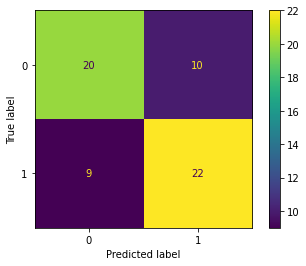

In [53]:
plot_confusion_matrix(knn_model,x_test,y_test)

In [54]:
accuracy_score(y_test,y_pred)

0.6885245901639344

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## Hyper Parameter Tuning

#### Grid Search CV

In [29]:
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
gscv_model= GridSearchCV(knn_model,hyperparamters,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11, p=1),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [30]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1)

In [31]:
gscv_model.best_params_

{'n_neighbors': 6, 'p': 1}

In [37]:
knn_model=KNeighborsClassifier(n_neighbors=6,p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [38]:
y_pred1=knn_model.predict(x_test)
confusion_matrix(y_test,y_pred1)

array([[21,  9],
       [10, 21]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred1)

0.6885245901639344

#### Randomized Search Cv

In [40]:
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
rscv_model= RandomizedSearchCV(knn_model,hyperparamters,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=6, p=1),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'p': [1, 2]})

In [41]:
rscv_model.best_params_

{'p': 1, 'n_neighbors': 9}

In [42]:
knn_model=KNeighborsClassifier(n_neighbors=9,p=1)
knn_model.fit(x_train,y_train)
y_pred2=knn_model.predict(x_test)
accuracy_score(y_test,y_pred2)

KNeighborsClassifier(n_neighbors=9, p=1)

In [43]:
y_pred2=knn_model.predict(x_test)
confusion_matrix(y_test,y_pred2)

array([[16, 14],
       [ 8, 23]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred2)

0.639344262295082

#### Manual Adjustment of Params

In [46]:
knn_model=KNeighborsClassifier(n_neighbors=5,p=2)
knn_model.fit(x_train,y_train)
y_pred3=knn_model.predict(x_test)
accuracy_score(y_test,y_pred3)

0.5737704918032787